<a href="https://colab.research.google.com/github/sipocz/Garbage_Classification/blob/main/Garbage_Classification_Autoencoder_20211026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
!rm -r sample_data/

In [4]:
fnames={
        'cardboard':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip',
        'glass':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/glass.zip',
        'metal':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/metal.zip',
        'paper':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/paper.zip',
        'plastic':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/plastic.zip',
        'trash':'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'
}


In [5]:
rm *.zip

rm: cannot remove '*.zip': No such file or directory


In [6]:
def create_dir(fnames):
    for key in fnames:
        !mkdir graf
        dirname="./graf/"+key
        !mkdir $dirname
        allfile=dirname+"/*"
        !rm $allfile
        fname_url_tmp=fnames[key]
        fname=key+".zip"
        !wget $fname_url_tmp
        !cp $fname $dirname 
        
        !rm $fname
        zipname=dirname+"/"+key+".zip"
        print("dirname:",dirname)
        !unzip $zipname -d "./graf"
        #!rm $zipname  

In [7]:
!unzip --help

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [8]:
fnames["trash"]

'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'

In [9]:
!cd metal

/bin/bash: line 0: cd: metal: No such file or directory


In [10]:
create_dir(fnames)

rm: cannot remove './graf/cardboard/*': No such file or directory
--2021-10-25 22:34:09--  https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip [following]
--2021-10-25 22:34:10--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093838 (5.8M) [application/zip]
Saving to: ‘cardboard.zip’

cardb

In [11]:
def format_image(image_dir):
    image = tf.read_file(image_dir)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize_image_with_pad(image, 256, 256, align_corners=True)
    return image

In [12]:
imagedir="./graf"
img_width,img_height=512,384
batch_size=5

In [13]:
import pandas as pd


In [14]:
train_path='./graf'

In [15]:
test_path='./graf'

In [16]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
#paths to the train, validation and test image datasets 
train_path = './graf'
valid_path = './graf'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=1, subset='validation')


Found 1804 images belonging to 6 classes.
Found 197 images belonging to 6 classes.


In [18]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [19]:
import os
print(os.listdir('./graf'))

['glass', 'metal', 'paper', 'cardboard', 'plastic', 'trash']


In [20]:
data_path = './graf'

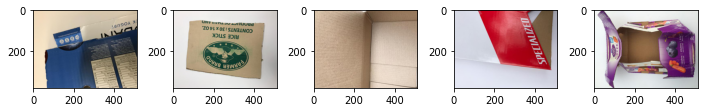

In [21]:
plot_imgs(data_path+'/cardboard')

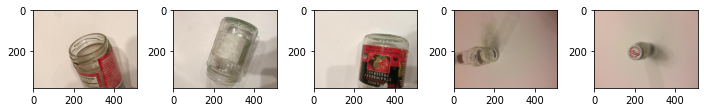

In [22]:
plot_imgs(data_path+'/glass')

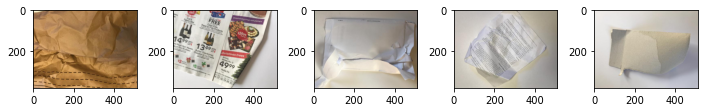

In [23]:
plot_imgs(data_path+'/paper')

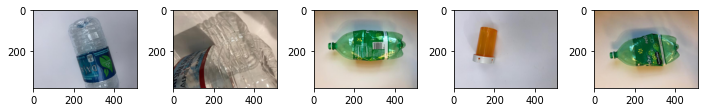

In [24]:
plot_imgs(data_path+'/plastic')

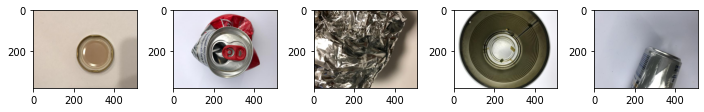

In [25]:
plot_imgs(data_path+'/metal')

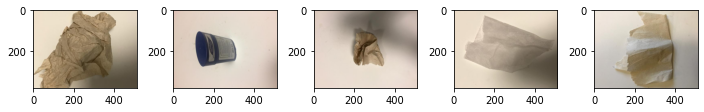

In [26]:
plot_imgs(data_path+'/trash')

In [27]:
batch_size = 1

In [28]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.0,zoom_range = 0.0,
                         width_shift_range = 0.0,
                         height_shift_range = 0.0,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

x_pxm=512
y_pxm=384
divider=8
x_px=int(x_pxm/divider)
y_px=int(y_pxm/divider)

print(f"X: {x_px}, Y: {y_px}")
train_generator=train.flow_from_directory(data_path,target_size=(x_px,y_px),batch_size=batch_size,class_mode='input',subset='training',color_mode="rgb")
test_generator=test.flow_from_directory(data_path,target_size=(x_px,y_px),batch_size=batch_size,class_mode='input',subset='validation',color_mode="rgb")

X: 64, Y: 48
Found 1804 images belonging to 6 classes.
Found 197 images belonging to 6 classes.


In [29]:
train_generator.image_shape

(64, 48, 3)

In [30]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [31]:
num_classes = 6

In [65]:
# Build Model
# Importáld a megfelelő rétegeket
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv2D, Dropout,Convolution2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, Rescaling,RandomFlip,RandomRotation, Reshape

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
from tensorflow.keras import backend as K
from keras.regularizers import l1
from keras.initializers import RandomNormal,Zeros,GlorotUniform
K.clear_session()

Xmax=64
Ymax=48
bpc=3
flat=Xmax*Ymax*bpc
inputs= Input(shape=(Xmax,Ymax,bpc))

ll=GlorotUniform()

# Encoder

x = Flatten()(inputs)

x = Dense(1000,activation="linear",kernel_initializer=ll)(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(x)


# Decoder
coded = Dense(100,activation="linear",kernel_initializer=ll, name="coded")(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(coded)
x = Dense(1000,activation="linear",kernel_initializer=ll)(coded)


x = Dense(flat,activation="linear",kernel_initializer=ll)(x)

x = Reshape((Xmax,Ymax,bpc))(x)


#x = Conv2DTranspose(3, (2, 2), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputs, x)






In [86]:
# Compile Model
optimizer=SGD(0.001,)
autoencoder.compile(loss='MSE', optimizer=optimizer, metrics=['MSE'])
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 48, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              9217000   
_________________________________________________________________
coded (Dense)                (None, 100)               100100    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_2 (Dense)              (None, 9216)              9225216   
_________________________________________________________________
reshape (Reshape)            (None, 64, 48, 3)         0     

In [87]:
model_path="garbage_2_cnn.h5"

#checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')



In [88]:
paths="./graf"
XSize=256
YSize=192

In [89]:
 keras_ds = tf.keras.preprocessing.image_dataset_from_directory(paths, batch_size=1, image_size=(XSize, YSize),label_mode=None)

Found 2001 files belonging to 1 classes.


In [90]:
keras_ds

<BatchDataset shapes: (None, 256, 192, 3), types: tf.float32>

In [91]:
num_epochs = 5
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [92]:
from keras.models import load_model
#model=load_model(modelfname)

In [93]:
def scheduler(epoch, lr):
  return 0.01



In [94]:
LR_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [95]:
#callbacks_list = [checkpoint1,LR_callback]

In [96]:
#dr1.rate=0.9

In [106]:
# Train Model
history = autoencoder.fit(train_generator, epochs=10, validation_data=test_generator,batch_size=1)

Epoch 1/10
1804/1804 [==============================] - 15s 8ms/step - loss: 0.0398 - MSE: 0.0398 - val_loss: 0.0392 - val_MSE: 0.0392
Epoch 2/10
1804/1804 [==============================] - 15s 8ms/step - loss: 0.0397 - MSE: 0.0397 - val_loss: 0.0389 - val_MSE: 0.0389
Epoch 3/10
1235/1804 [===================>..........] - ETA: 4s - loss: 0.0404 - MSE: 0.0404

KeyboardInterrupt: ignored

In [98]:
pik=train_generator.next()

In [99]:
pik0=pik[0]*256
pik1=pik[1]*256

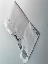

In [100]:

from google.colab.patches import cv2_imshow
cv2_imshow(pik0[0],)

In [101]:
o1=autoencoder.predict(pik[0])

In [102]:
oo=o1*256

In [103]:
oo.shape

(1, 64, 48, 3)

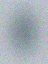

In [104]:
cv2_imshow(oo[0])

In [105]:
---

SyntaxError: ignored

In [ ]:
plt.imshow(pik0[0].astype("uint8"))

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')


In [ ]:
def imgshow():
    import matplotlib.pyplot as plt
    batch = train_generator.take(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    plt.gray() # use this line if you don't want to see it in color
    plt.imshow(plotData)
    plt.show()

In [ ]:
imgshow()

In [ ]:
data_dir="./graf"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, label_mode=None)

In [ ]:
type(train_ds)
t1=train_ds.as_numpy_iterator()

In [ ]:
t1.next()

In [ ]:
batch=train_ds.take(1)

plt.imshow(batch(1))

In [ ]:
batch

In [ ]:
batch

In [ ]:
list(train_ds.take(1))
plt.imshow(train_ds.take(1))

In [ ]:
list(train_ds.take(1))